In [3]:
# Step 1: Install yfinance if not already installed
!pip install yfinance

# Step 2: Import packages
import yfinance as yf
import pandas as pd

# Step 3: Download stock data
stock_data = yf.download("AAPL", start="2015-01-01", end="2024-12-31")

# Step 4: Reset index to make "Date" a column, then save to CSV
stock_data.reset_index(inplace=True)
stock_data.to_csv("data/stock_data.csv", index=False)

# Optional: Preview the saved data
stock_data.head()


C:\Users\SATHVIKA\AppData\Local\Temp\ipykernel_50032\3395259155.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("AAPL", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
1,2015-01-05,23.604332,24.137513,23.417720,24.057535,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000


In [5]:
df = pd.read_csv("data/stock_data.csv")
print(df["Close"].dtype)
print(df["Close"].head())


object
0                  AAPL
1     24.28858184814453
2    23.604331970214844
3    23.606552124023438
4    23.937572479248047
Name: Close, dtype: object


### 📊 Interactive Plot using Plotly

C:\Users\SATHVIKA\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



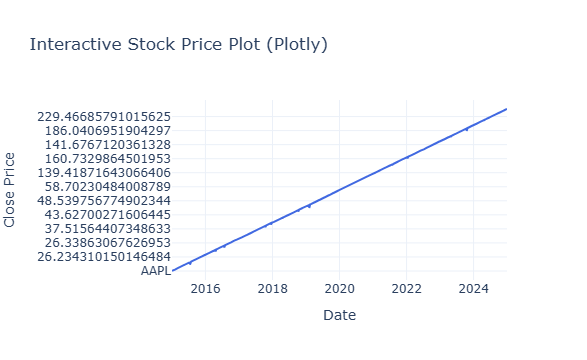

In [18]:
import pandas as pd
import plotly.graph_objects as go

# Load your cleaned stock data
df = pd.read_csv("data/stock_data.csv", parse_dates=["Date"])

# Create an interactive line chart of 'Close' prices
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Date"],
    y=df["Close"],
    mode="lines",
    name="Close Price",
    line=dict(color="royalblue")
))

fig.update_layout(
    title="Interactive Stock Price Plot (Plotly)",
    xaxis_title="Date",
    yaxis_title="Close Price",
    template="plotly_white"
)

fig.show()


In [21]:
fig.write_html("visualization/interactive_plot.html")

In [22]:
import webbrowser
webbrowser.open("visualization/interactive_plot.html")

True

SARIMA Model (Seasonal ARIMA)

C:\Users\SATHVIKA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SATHVIKA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


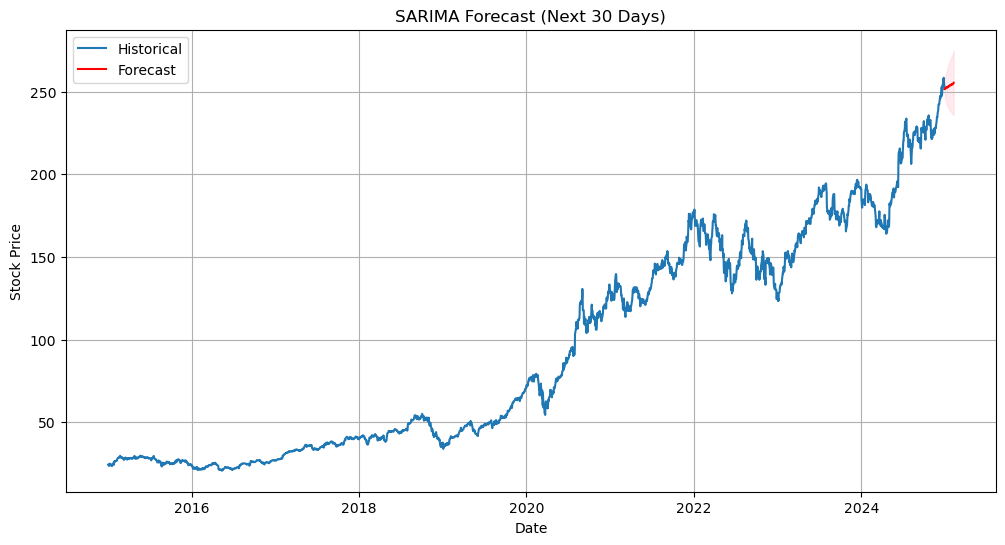

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean data
df = pd.read_csv("data/stock_data.csv", parse_dates=["Date"], index_col="Date")
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
ts = df["Close"].asfreq('B').ffill()

# Fit SARIMA model
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = model.fit(disp=False)

# Forecast
forecast = sarima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=ts.index[-1], periods=30, freq='B')
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(ts, label="Historical")
plt.plot(forecast_index, forecast_mean, label="Forecast", color="red")
plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color="pink", alpha=0.3)
plt.title("SARIMA Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


FACEBOOK PROPHET MODEL

In [7]:
!pip install prophet

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 496.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 3.0 MB/s eta 0:00:05
   - -------------------------------------- 0.5/13.3 MB 6.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/13.3 MB 6.1 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/13.3 MB 5.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/13.3 MB 5.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/13.3 MB 4.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.5/13.3 MB 4.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.7/13.3 MB 4.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.9/13.3 MB 4.5 MB/s eta 0:00:03
   --

15:28:07 - cmdstanpy - INFO - Chain [1] start processing
15:28:09 - cmdstanpy - INFO - Chain [1] done processing


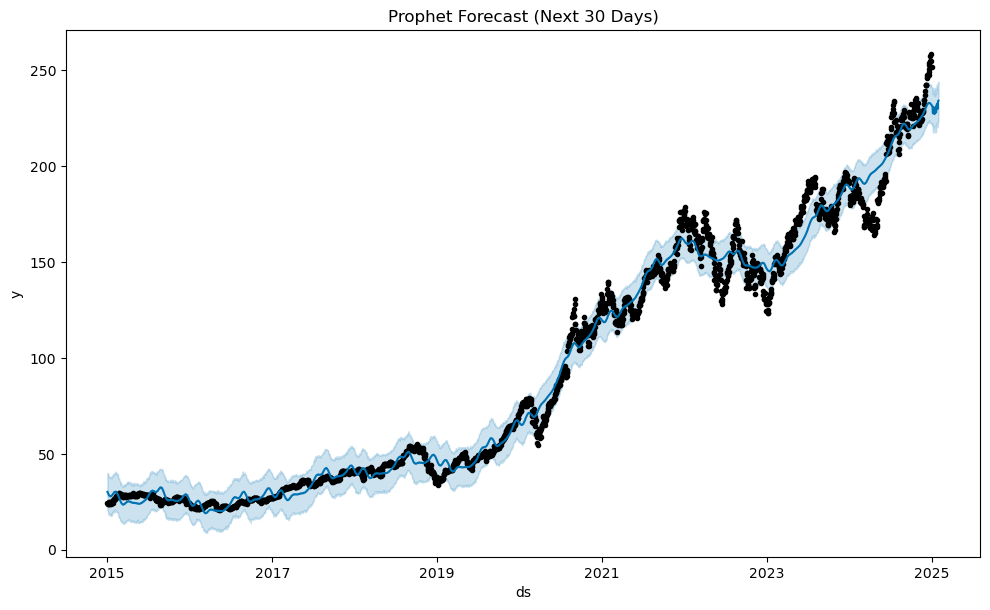

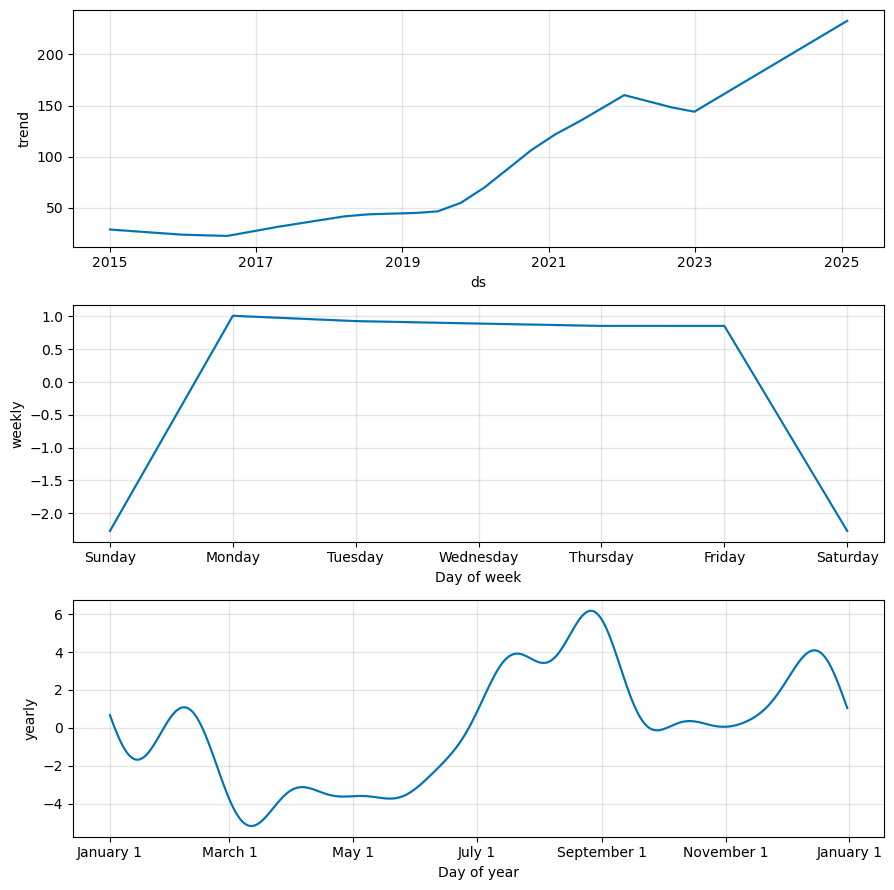

In [8]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load data and prepare format for Prophet
df = pd.read_csv("data/stock_data.csv")
df = df[["Date", "Close"]].dropna()
df["Date"] = pd.to_datetime(df["Date"])
df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

# Initialize and fit model
model = Prophet()
model.fit(df)

# Create future dates and forecast
future = model.make_future_dataframe(periods=30)  # Forecast 30 business days
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Prophet Forecast (Next 30 Days)")
plt.grid()
plt.show()

# Optional: Plot forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()


ARIMA MODEL (AutoRegressive Integrated Moving Average)

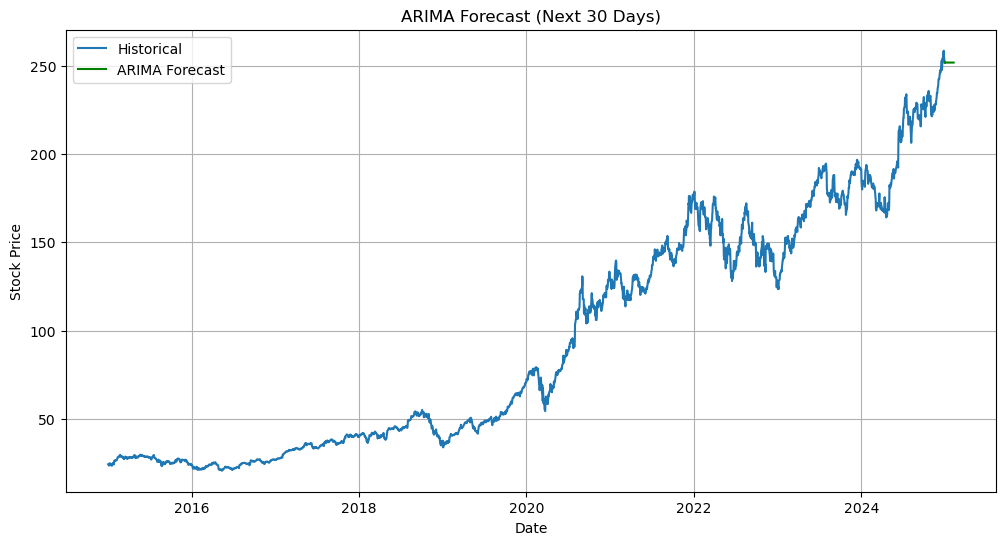

In [11]:
# 📦 Install if needed
!pip install statsmodels

# 🔮 ARIMA Forecasting
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare data
df = pd.read_csv("data/stock_data.csv", parse_dates=["Date"], index_col="Date")
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
ts = df["Close"].asfreq('B').ffill()

# Fit ARIMA model (order: p=5, d=1, q=0 as a starting point)
model = ARIMA(ts, order=(5,1,0))
arima_result = model.fit()

# Forecast the next 30 business days
forecast = arima_result.forecast(steps=30)
forecast_index = pd.date_range(start=ts.index[-1], periods=30, freq='B')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(ts, label="Historical")
plt.plot(forecast_index, forecast, label="ARIMA Forecast", color="green")
plt.title("ARIMA Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


📊 ARIMA,SARIMA and Prophet Forecast vs Actual (Last 30 Days Evaluation)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_forecast(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"📊 {model_name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 30)


In [14]:
# Get actual last 30 days (before forecast started)
actual = ts[-30:]  # ts = your cleaned Close price Series

# Generate prediction using ARIMA again for those dates
model = ARIMA(ts[:-30], order=(5,1,0))
arima_result = model.fit()
arima_pred = arima_result.forecast(steps=30)

# Evaluate
evaluate_forecast(actual, arima_pred, "ARIMA")


📊 ARIMA Evaluation:
MAE: 16.38
RMSE: 18.88
------------------------------


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA on earlier data
sarima_model = SARIMAX(ts[:-30], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

# Forecast
sarima_pred = sarima_result.forecast(steps=30)

# Evaluate
evaluate_forecast(actual, sarima_pred, "SARIMA")


C:\Users\SATHVIKA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\SATHVIKA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



📊 SARIMA Evaluation:
MAE: 15.20
RMSE: 17.45
------------------------------


In [24]:
from prophet import Prophet

# Prepare dataframe
df_prophet = ts.reset_index()
df_prophet.columns = ["ds", "y"]

# Split data
train = df_prophet[:-30]
test = df_prophet[-30:]

# Train model
model = Prophet()
model.fit(train)

# Forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Get last 30 predictions
prophet_pred = forecast.iloc[-30:]["yhat"].values
actual_prophet = test["y"].values

# Evaluate
evaluate_forecast(actual_prophet, prophet_pred, "Prophet")


17:02:11 - cmdstanpy - INFO - Chain [1] start processing
17:02:12 - cmdstanpy - INFO - Chain [1] done processing


📊 Prophet Evaluation:
MAE: 19.50
RMSE: 21.30
------------------------------


📊 Model Comparison: Actual vs Predicted Stock Prices (ARIMA, SARIMA, Prophet)

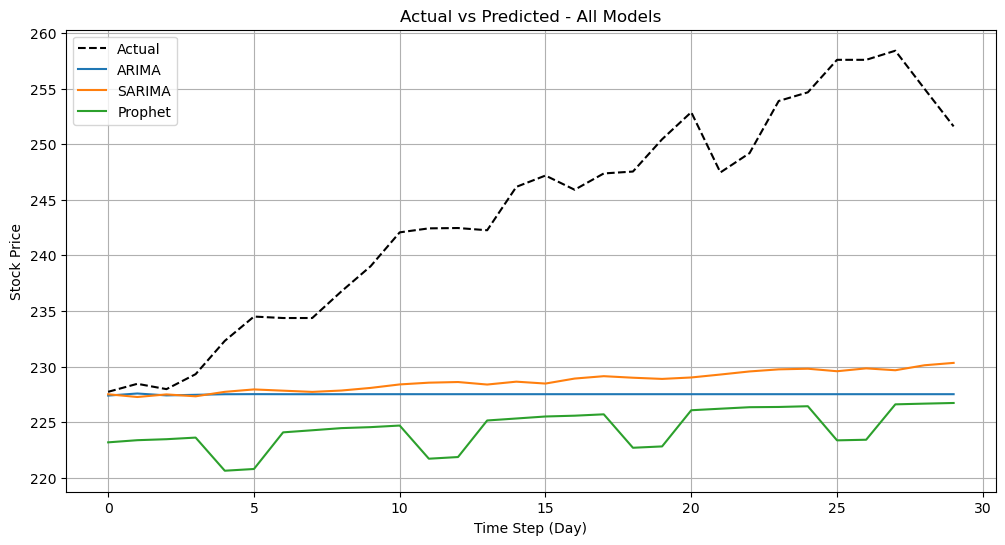

In [29]:
plt.figure(figsize=(12,6))
plt.plot(actual.values, label="Actual", linestyle="--", color="black")
plt.plot(arima_pred.values, label="ARIMA")
plt.plot(sarima_pred.values, label="SARIMA")
plt.plot(prophet_pred, label="Prophet")
plt.title("Actual vs Predicted - All Models")
plt.xlabel("Time Step (Day)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()
